# ALGORITMO PCA

In [1]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import pca

### Cargamos nuestros datos

In [2]:
dataMat = pca.loadDataSet('testSet.txt')


### Ahora, hagamos el PCA de este conjunto de datos:

In [3]:
lowDMat, reconMat = pca.pca(dataMat, 1)


### LowDMat contiene la matriz en nuestras dimensiones reducidas, que debe ser una dimensión

In [4]:
shape(lowDMat)


(1000, 1)

### Graficamos  los datos originales:

In [5]:
fig = plt.figure()


In [6]:
ax = fig.add_subplot(111)

In [7]:
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0],marker='^', s=90)


In [8]:
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=50, c='red')


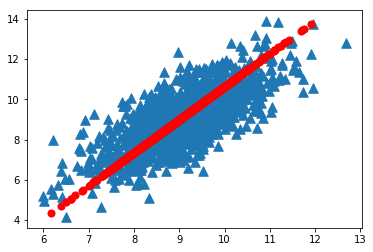

In [9]:
plt.show()


### Los datos reconstruidos deben superponerse a los datos originales porque no se eliminan las características.

In [10]:
lowDMat, reconMat = pca.pca(dataMat, 2)


In [11]:
shape(lowDMat)

(1000, 2)

In [12]:
fig = plt.figure()

In [13]:
ax = fig.add_subplot(111)

In [14]:
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0],marker='^', s=90)

In [15]:
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=50, c='red')

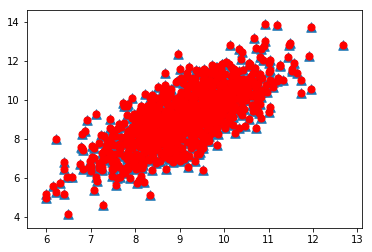

In [16]:
plt.show()

## Utilizando PCA para reducir la dimensión de los datos de fabricación de semiconductores
### Sustituimos cualquier valor NaN por la media

In [17]:
!cat secom.data

3030.93 2564 2187.7333 1411.1265 1.3602 100 97.6133 0.1242 1.5005 0.0162 -0.0034 0.9455 202.4396 0 7.9558 414.871 10.0433 0.968 192.3963 12.519 1.4026 -5419 2916.5 -4043.75 751 0.8955 1.773 3.049 64.2333 2.0222 0.1632 3.5191 83.3971 9.5126 50.617 64.2588 49.383 66.3141 86.9555 117.5132 61.29 4.515 70 352.7173 10.1841 130.3691 723.3092 1.3072 141.2282 1 624.3145 218.3174 0 4.592 4.841 2834 0.9317 0.9484 4.7057 -1.7264 350.9264 10.6231 108.6427 16.1445 21.7264 29.5367 693.7724 0.9226 148.6009 1 608.17 84.0793 NaN NaN 0 0.0126 -0.0206 0.0141 -0.0307 -0.0083 -0.0026 -0.0567 -0.0044 7.2163 0.132 NaN 2.3895 0.969 1747.6049 0.1841 8671.9301 -0.3274 -0.0055 -0.0001 0.0001 0.0003 -0.2786 0 0.3974 -0.0251 0.0002 0.0002 0.135 -0.0042 0.0003 0.0056 0 -0.2468 0.3196 NaN NaN NaN NaN 0.946 0 748.6115 0.9908 58.4306 0.6002 0.9804 6.3788 15.88 2.639 15.94 15.93 0.8656 3.353 0.4098 3.188 -0.0473 0.7243 0.996 2.2967 1000.7263 39.2373 123 111.3 75.2 46.2 350.671 0.3948 0 6.78 0.0034 0.0898 0.085 0.0358 0.

In [18]:
dataMat = pca.replaceNanWithMean()
dataMat


matrix([[  3.03093000e+03,   2.56400000e+03,   2.18773330e+03, ...,
           1.64749042e-02,   5.28333333e-03,   9.96700663e+01],
        [  3.09578000e+03,   2.46514000e+03,   2.23042220e+03, ...,
           2.01000000e-02,   6.00000000e-03,   2.08204500e+02],
        [  2.93261000e+03,   2.55994000e+03,   2.18641110e+03, ...,
           4.84000000e-02,   1.48000000e-02,   8.28602000e+01],
        ..., 
        [  2.97881000e+03,   2.37978000e+03,   2.20630000e+03, ...,
           8.60000000e-03,   2.50000000e-03,   4.35231000e+01],
        [  2.89492000e+03,   2.53201000e+03,   2.17703330e+03, ...,
           2.45000000e-02,   7.50000000e-03,   9.34941000e+01],
        [  2.94492000e+03,   2.45076000e+03,   2.19544440e+03, ...,
           1.62000000e-02,   4.50000000e-03,   1.37784400e+02]])

### Eliminamos la media

In [19]:
meanVals = mean(dataMat, axis=0)
meanVals


matrix([[  3.01445290e+03,   2.49585023e+03,   2.20054732e+03,
           1.39637663e+03,   4.19701314e+00,   1.00000000e+02,
           1.01112908e+02,   1.21821502e-01,   1.46286166e+00,
          -8.41022364e-04,   1.45750799e-04,   9.64352780e-01,
           1.99956809e+02,   0.00000000e+00,   9.00537052e+00,
           4.13086035e+02,   9.90760281e+00,   9.71443926e-01,
           1.90047354e+02,   1.24810340e+01,   1.40505424e+00,
          -5.61839361e+03,   2.69937843e+03,  -3.80629973e+03,
          -2.98598136e+02,   1.20384473e+00,   1.93847681e+00,
           6.63862799e+00,   6.94995323e+01,   2.36619744e+00,
           1.84158914e-01,   3.67318939e+00,   8.53374687e+01,
           8.96027854e+00,   5.05826386e+01,   6.45557870e+01,
           4.94173705e+01,   6.62212736e+01,   8.68365766e+01,
           1.18679554e+02,   6.79049093e+01,   3.35306617e+00,
           7.00000000e+01,   3.55538904e+02,   1.00311650e+01,
           1.36743060e+02,   7.33672811e+02,   1.177958

In [20]:
meanRemoved = dataMat - meanVals


### Calculamos  la matriz de covarianza:

In [21]:
covMat = cov(meanRemoved, rowvar=0)
covMat


array([[  5.39940056e+03,  -8.47962623e+02,   1.02671010e+01, ...,
         -1.67440688e-02,  -5.93197815e-03,   2.87879850e+01],
       [ -8.47962623e+02,   6.43649877e+03,   1.35942679e+01, ...,
          1.21967287e-02,   2.32652705e-03,   3.37335304e+02],
       [  1.02671010e+01,   1.35942679e+01,   8.63239193e+02, ...,
         -7.59126039e-03,  -2.59521865e-03,  -9.07023669e+01],
       ..., 
       [ -1.67440688e-02,   1.21967287e-02,  -7.59126039e-03, ...,
          7.75231441e-05,   2.45865358e-05,   3.22979001e-01],
       [ -5.93197815e-03,   2.32652705e-03,  -2.59521865e-03, ...,
          2.45865358e-05,   8.21484994e-06,   1.04706789e-01],
       [  2.87879850e+01,   3.37335304e+02,  -9.07023669e+01, ...,
          3.22979001e-01,   1.04706789e-01,   8.81006310e+03]])

### Por último,calculamos los valores propios de la matriz de covarianza:

In [22]:
eigVals,eigVects = linalg.eig(mat(covMat))
eigVects

matrix([[ -6.39070760e-04+0.j,  -1.20314234e-04+0.j,   1.22460363e-04+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        [  2.35722934e-05+0.j,  -6.60163227e-04+0.j,   1.71369126e-03+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        [  2.36801459e-04+0.j,   1.58026311e-04+0.j,   3.28185512e-04+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        ..., 
        [  2.61329351e-08+0.j,  -6.06233975e-09+0.j,   1.09328336e-09+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        [  5.62597732e-09+0.j,   5.96647587e-09+0.j,   8.83024927e-09+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.j],
        [  3.89298443e-04+0.j,  -2.32070657e-04+0.j,   7.13534990e-04+0.j,
         ...,   0.00000000e+00+0.j,   0.00000000e+00+0.j,
           0.00000000e+00+0.

### Los valores propios son: 

In [23]:
eigVals


array([  5.34151979e+07 +0.00000000e+00j,
         2.17466719e+07 +0.00000000e+00j,
         8.24837662e+06 +0.00000000e+00j,
         2.07388086e+06 +0.00000000e+00j,
         1.31540439e+06 +0.00000000e+00j,
         4.67693557e+05 +0.00000000e+00j,
         2.90863555e+05 +0.00000000e+00j,
         2.83668601e+05 +0.00000000e+00j,
         2.37155830e+05 +0.00000000e+00j,
         2.08513836e+05 +0.00000000e+00j,
         1.96098849e+05 +0.00000000e+00j,
         1.86856549e+05 +0.00000000e+00j,
         1.52422354e+05 +0.00000000e+00j,
         1.13215032e+05 +0.00000000e+00j,
         1.08493848e+05 +0.00000000e+00j,
         1.02849533e+05 +0.00000000e+00j,
         1.00166164e+05 +0.00000000e+00j,
         8.33473762e+04 +0.00000000e+00j,
         8.15850591e+04 +0.00000000e+00j,
         7.76560524e+04 +0.00000000e+00j,
         6.66060410e+04 +0.00000000e+00j,
         6.52620058e+04 +0.00000000e+00j,
         5.96776503e+04 +0.00000000e+00j,
         5.16269933e+04 +0.0000000

In [1]:
eigVects

NameError: name 'eigVects' is not defined